## Tonale Winter School on Cosmology 2022 
# Tutorial on Gravitational Lensing

## Exercise 1: Lensing Maps

The goal of this exercise is to visualize the maps of several lensing quantities for a large gravitational lens, i.e. a massive galaxy cluster.

>**Warning**: it is important that you execute the cells following the order given in the Notebook. If you execute a cell changing the value of a variable and then go back to some previous cell in the Notebook, the variable value will not change!

### Lensing potential

In Lecture 1, we explained that, in the thin screen approximation, the lens is projected onto the lens plane. We defined the *lensing potential* as

$$
\hat\Psi(\vec\theta) = \frac{D_{LS}}{D_LD_S}\frac{2}{c^2}\int\Phi(D_L\vec\theta,z)dz
$$

and derived several relations between the lensing potential and other quantities such as the deflection angle, the convergence, and the shear. Now, we will implement those relations and visualize how those quantities look like.

In the `./data/` folder, you will find a file named `pot_D1_066_0.fits`. For those of you who are not familiar with the `.fits` format, please check out [this page](https://fits.gsfc.nasa.gov/fits_documentation.html). The file contains the map of the lensing potential of a simulated galaxy cluster (obtained from a cosmological hydrodynamical simulation) in a flat $\Lambda CDM$ cosmology with $\Omega_m=0.24$,  $\Omega_\Lambda=0.76$, and $H_0=72$ km $s^{-1}$ $\mathrm{Mpc}^{-1}$. 

Let's see how we can view the file content with the `astropy.io.fits` module:

In [1]:
import astropy.io.fits as pyfits # we import the module to manage .fits files from astropy.io. We call it pyfits.
import numpy as np

hdul = pyfits.open('./data/pot_D1_066_0.fits') # open and read the file
# hdul is a list of Header/Data Units (HDU). Each HDU consists of an ASCII formatted header unit and of a data unit (an image, a data cube, a table...)
# both units can be accessed as attributes of the elements of hdul. In the case of this file, there is only one HDU, which can be accessed with hdul[0]
pot = hdul[0].data # the data unit
header = hdul[0].header # the header unit

Let's print the header on screen:

In [2]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
EXTEND  =                    T                                                  
RADESYS = 'ICRS    '                                                            
CTYPE1  = 'RA---TAN'                                                            
CUNIT1  = 'deg     '                                                            
CTYPE2  = 'DEC--TAN'                                                            
CUNIT2  = 'deg     '                                                            
CD1_1   = -2.7126736111111E-05                                                  
CD1_2   =                  0

Some relevant quantities are reported in the header. First of all, the data unit contains an image (the map of the lensing potential) of 2048x2048 pixels (`NAXIS1`x `NAXIS2`). The pixel scale (`CD2_2`=-`CD1_1`) is 2.7126e-5 deg (`CUNIT1`=`CUNIT2`) = 0.098 arcsec. The keywords `ZL` and `ZS` indicate the lens (0.3492) and source redshifts (3.0), respectively. The latest is the redshift used to compute $D_S$ and $D_{LS}$ in the given cosmological model when the lensing potential was mapped. The central pixel (1024,1024) corresponds to (RA,DEC)=(0,0).

The map of the potential (with overlaid contour levels) is shown below. Note that, we use the pixel scale to compute the field of view:

Text(0, 0.5, '$\\theta_2$ [arcsec]')

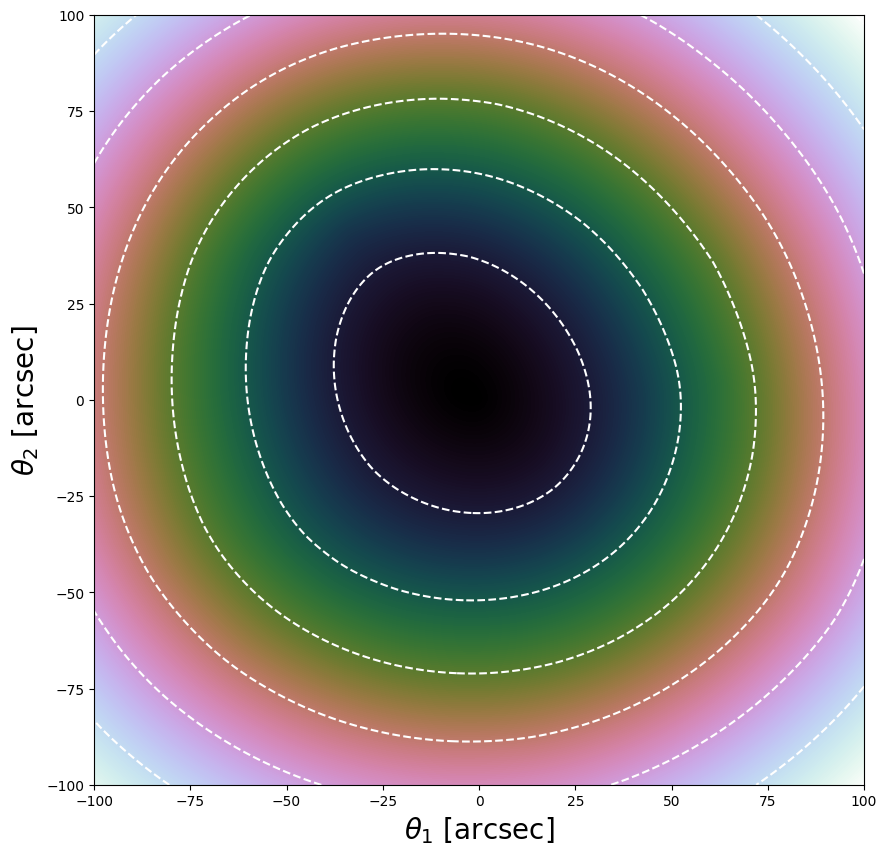

In [3]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

pixelscale = header['CD2_2']*3600.0 # pixel scale in arcsec
fov = header['NAXIS1']*pixelscale # FOV in arcsec

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(pot,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix')
ax.contour(pot,colors='white',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.])

ax.set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)


### Deflection angles

Now, we move on to the relation between the lensing potential and the deflection angles:

$$
\vec\nabla\hat\Psi(\vec\theta) = \vec\alpha(\vec\theta)
$$

which tells us that we can map the components of the deflection angles by computing the gradient of the lensing potential. For doing that, we use the [`gradient`](https://numpy.org/doc/stable/reference/generated/numpy.gradient.html) function from `numpy`. The following piece of code calculates two maps: one for the first (`a1`) and one for the second (`a2`) component of $\vec\alpha(\vec\theta)$: 

In [4]:
import numpy as np
a2, a1 = np.gradient(pot)
a1=(a1/pixelscale)
a2=(a2/pixelscale)

The `gradient` function approximates the derivatives by finite differences, assuming that the spacing between the `pot` values is unity by default. On the other hand the spacing in the map is `pixelscale`. Thus, we must divide the gradient components by `pixelscale` to get the correct result.

Use the following code to display the maps:

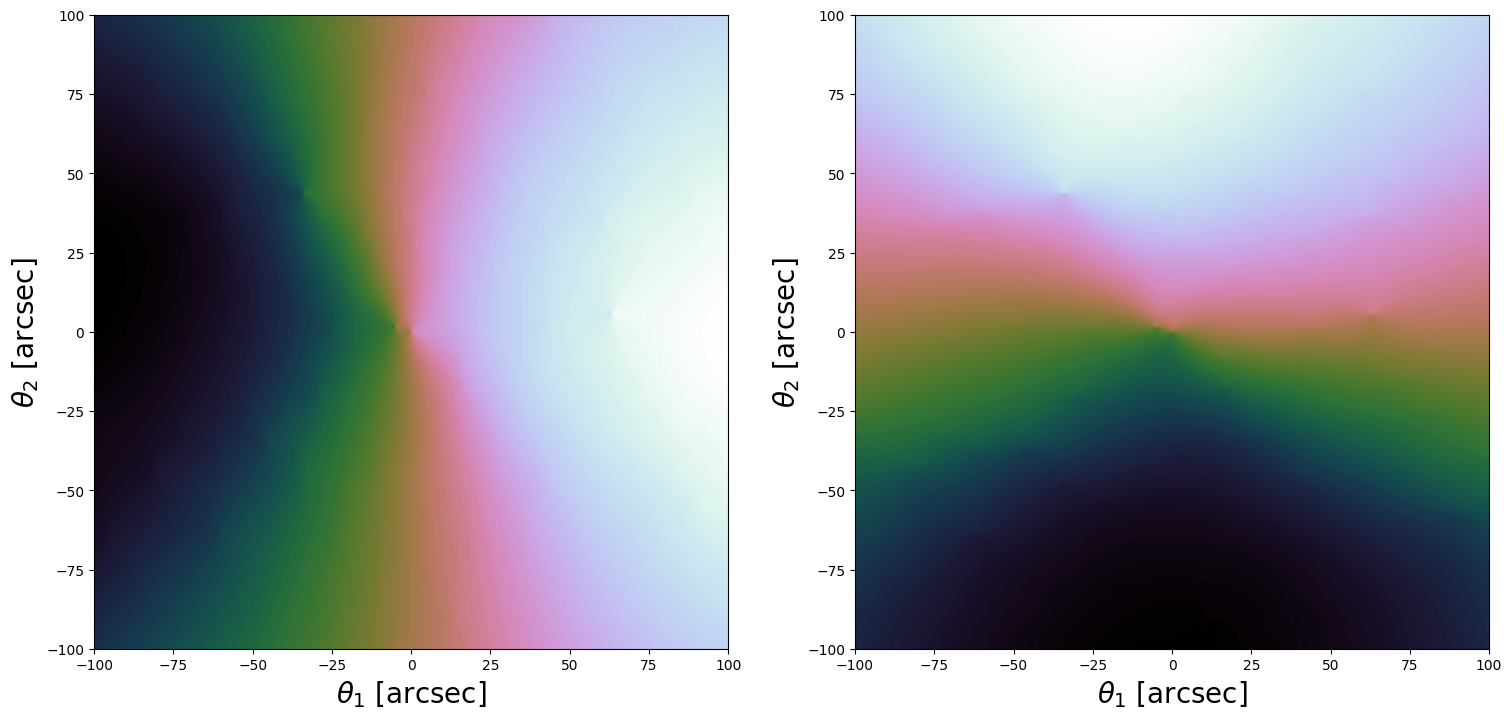

In [5]:
fig, ax = plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(a1,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix')
ax[1].imshow(a2,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix')

for i in range(2):
    ax[i].set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
    ax[i].set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)


> **TASK: Your **first task** is to discuss these maps: how do they compare with each other? How do they compare with the map of the lensing potential? What is the order of magnitude of the deflections produced by this lens?**


TODO: WRITE YOUR ANSWERS HERE


### Convergence

From the previous example, you should have learnt how to compute derivatives of a map using the `numpy.gradient` function. You can now move to **task 2**, which is calculating and displaying the lens convergence.

I remind you that twice the convergence is the Laplacian of the lensing potential:

$$
\triangle \hat\Psi(\vec\theta) = 2 \kappa(\vec{\theta}) 
$$

Considering the relation between the lensing potential and the deflection angle, the equation above suggests that you could calculate the Laplacian of $\hat\Psi(\vec\theta)$ from the spatial derivatives of the deflection angle components... 

> **TASK: compute the convergence map from the lensing potential.**
> **Save the convergence map in an array called `kappa`.**

In [6]:
# TODO: calculate the convergence
a12, a11 = np.gradient(a1)
a22, a12 = np.gradient(a2)

kappa = 0.5 * (a11+a22)/pixelscale

Use the code below to display the convergence map:

Text(0, 0.5, '$\\theta_2$ [arcsec]')

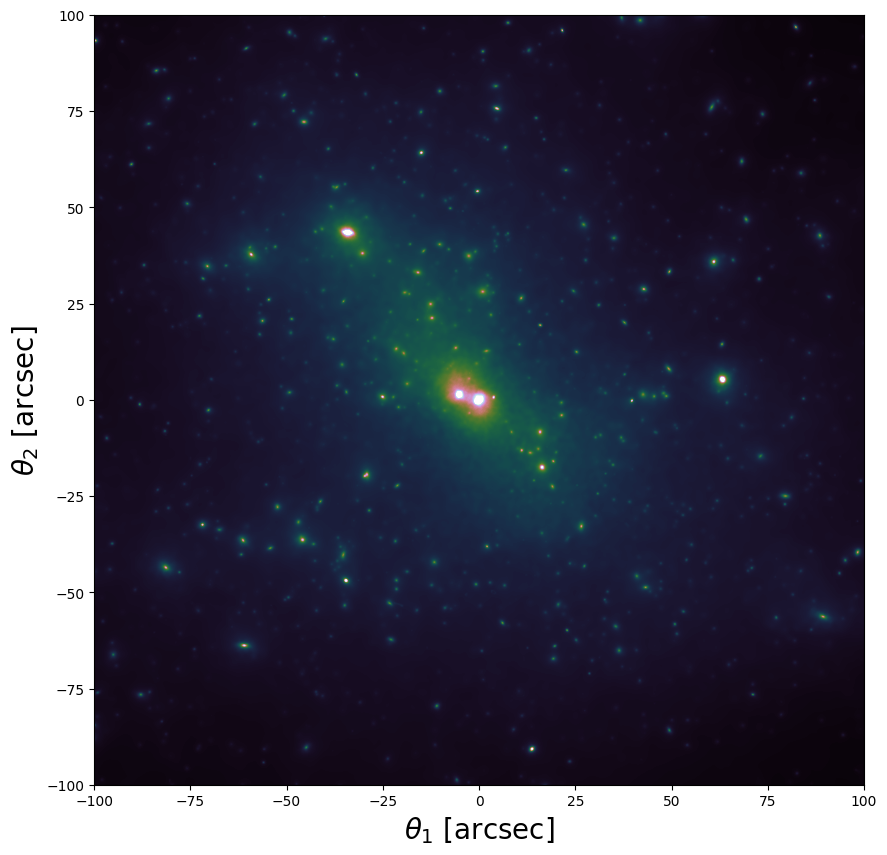

In [7]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(kappa,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],vmin=0.0,vmax=3.0,cmap='cubehelix')

ax.set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)

> **TASK: Discuss your findings: how does the lensing potential compare to the convergence map?**

TODO: WRITE YOUR ANSWERS HERE

### Shear maps

Now, it is time for your next **task**: compute the shear components. Remember that the shear components were defined using the second derivatives of the lensing potential:

$$
\gamma_1(\vec\theta) = \frac{1}{2}[\hat\Psi_{11}(\vec\theta)-\hat\Psi_{22}(\vec\theta)]
$$

and 

$$
\gamma_2 (\vec\theta) = \hat\Psi_{12}(\vec\theta)=\hat\Psi_{21}(\vec\theta)
$$

>**TASK: Compute the shear components from the lensing potential. Write your code in the cell below. Save the maps into two 2D-arrays called `gamma1` and `gamma2`.**

In [8]:
# TODO: calculate the shear components
gamma1 = 0.5 * (a11 - a22)/pixelscale
gamma2 = a12/pixelscale

We can now display the maps:

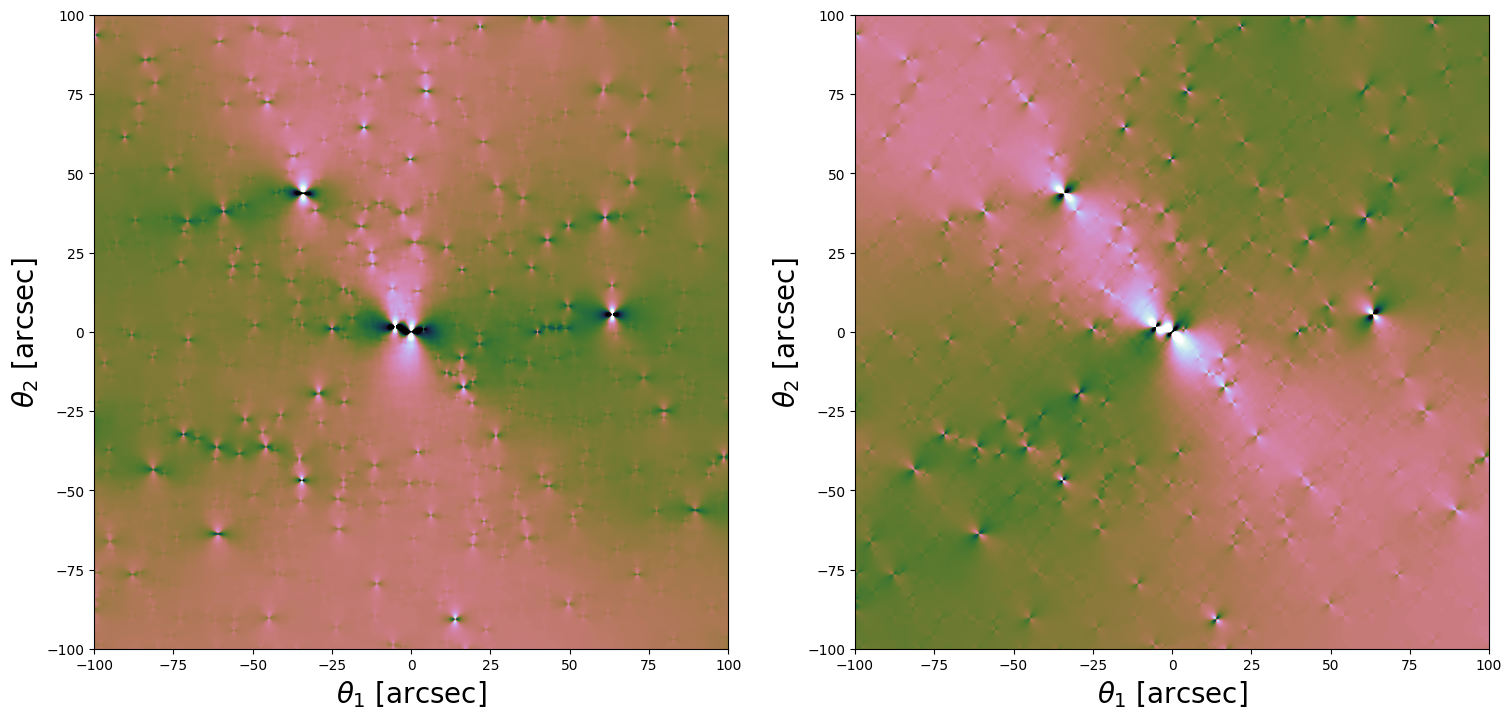

In [9]:
fig, ax = plt.subplots(1,2,figsize=(18,10))
ax[0].imshow(gamma1,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix',vmax=1.0,vmin=-1)
ax[1].imshow(gamma2,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix',vmax=1.0,vmin=-1)

for i in range(2):
    ax[i].set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
    ax[i].set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)

### Shear direction

The next **task** is a bit trickier. You have to visualize the shear using sticks (not arrows, because the shear is not a vector but a tensor!) overlaid on the lens convergence map, to show the shear direction compared to the underlying lens mass distribution. This representation will allow us to better understand how distant sources could be distorted due to gravitational lensing.

Since the maps shown above have a quite large number of pixels, we better downsample the maps. For doing this, we need to build a coarser grid covering the same regions displayed above. For example, let's say we want to sample the maps at 64x64 points. The following code would do the job: 

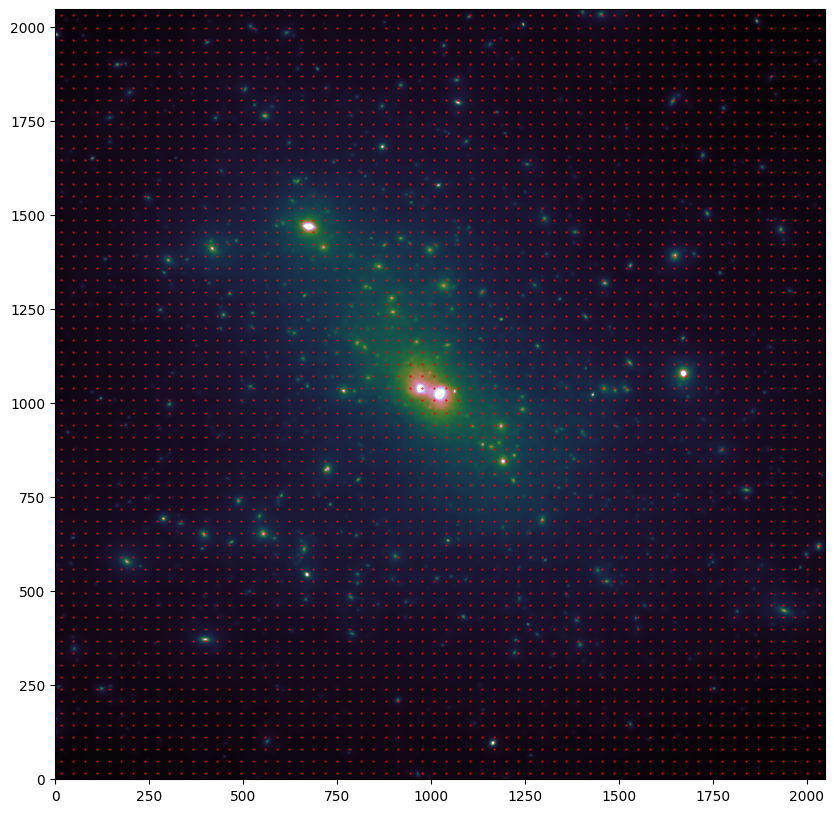

In [10]:
pixel_step=gamma1.shape[1]/64 
theta2,theta1 = np.meshgrid(np.arange(0,gamma1.shape[1],pixel_step),
                  np.arange(0,gamma1.shape[0],pixel_step))

theta1=(theta1+pixel_step/2-1).astype(int)
theta2=(theta2+pixel_step/2-1).astype(int)

fig,ax = plt.subplots(1,1,figsize=(10,10))
myplot=ax.plot(theta1,theta2,'o',color='red',ms=0.5)
xlim=[0,gamma1.shape[1]-1]
ylim=[0,gamma1.shape[1]-1]

ax.imshow(kappa,origin='lower',vmax=3,cmap='cubehelix')


The red points indicate the new positions on the maps where the shear will be sampled.

To represent the shear with sticks, you will use the [`quiver`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.quiver.html) function from `matplotlib.pyplot`. The inputs you must provide are: 

1) the coordinates where you want to represent the shear; 
2) the components of the headless vectors that quiver will draw.  

>**TASK: You will produce a figure with two panels. On the left, you will display the convergence map with overlaid sticks whose orientation will show the shear direction and whose length will be proportional to the shear modulus. On the right, you will display again the convergence map and the sticks, but the sticks will have all the same length.**
>
>To make the vectors headless with `quiver`, you will specify `headwidth=0.0` in the function call.

> **Tip**: the shear cannot be represented with vectors whose components are $\gamma_1$ and $\gamma_2$. Instead remember that the shear acts by stretching images along a direction forming an angle $\phi$ with the $\theta_1$ axis. This angle can be derived from the shear components. 
> **SUGGESTION**: to compute the angle with respect to the horizontal axis, you should use the `numpy.arctan2` function. This function of coordinates $(x,y)$ in the cartesian plane is an extension of the $arctan$ function which returns the angle measure (in the range $-\pi< \varphi < \le \pi$) between the positive horizontal axis $x$ and the ray from the origin to the point of coordinates $(x,y)$. In other words, this function is the phase of the complex number $x+iy$. Differently from `numpy.arctan`, which returns the same values for couples $(x,y)$ and $(-x,-y)$ or $(x,-y)$ and $(-x,y)$, the `numpy.arctan2` function can distinguish angles that are opposite with respect to the origin.


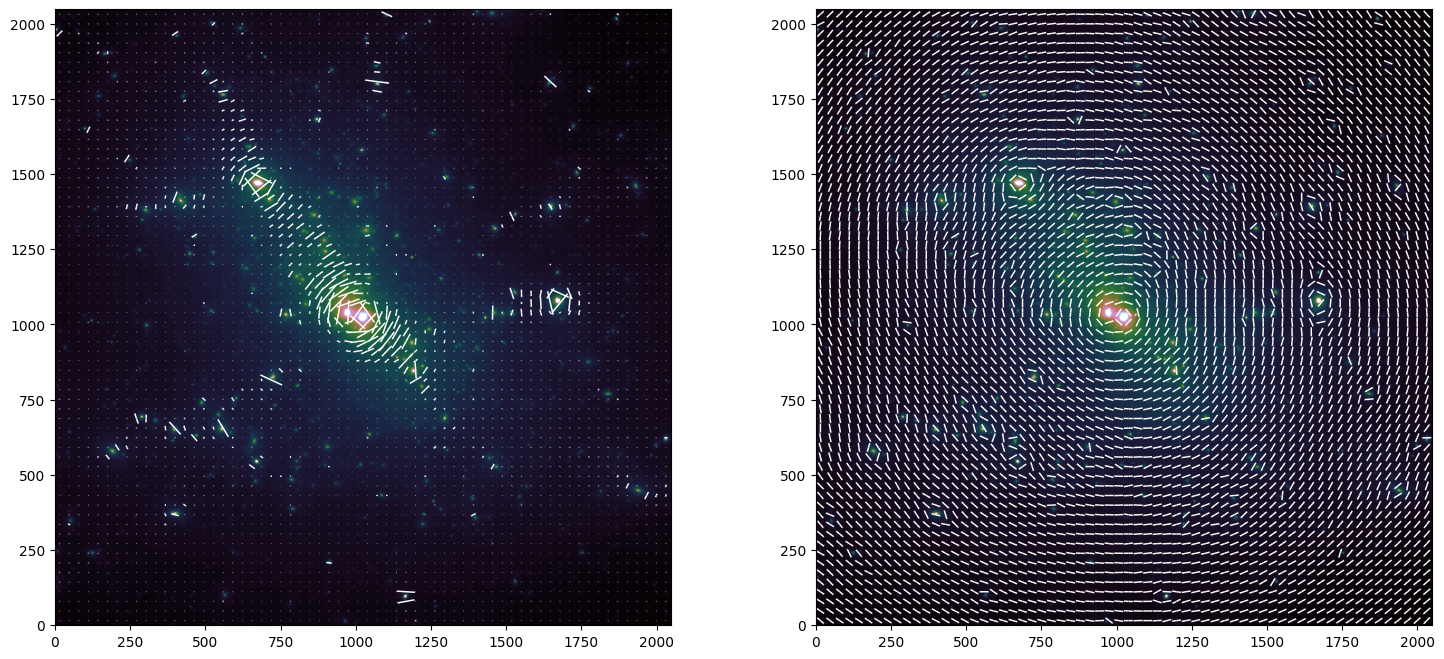

In [11]:
# TODO: in the next line, you should calculate the angles defining the shear direction
phi=np.arctan2(gamma2,gamma1)/2.0

# TODO: now compute the shear modulus
gamma=np.sqrt(gamma1**2+gamma2**2)

# for visualization purposes, we rescale the shear modulus by a factor of 5
gamma *= 5
# in addotion we saturate the shear values at gamma=3
ind = gamma > 3.0
gamma[ind]=3

# use these instructions to display the figure
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].imshow(kappa,origin='lower',vmax=3,cmap='cubehelix')
ax[1].imshow(kappa,origin='lower',vmax=3,cmap='cubehelix')

# showing the intensity and the orientation of the shear
ax[0].quiver(theta2,theta1,gamma[theta1,theta2]*np.cos(phi[theta1,theta2]),gamma[theta1,theta2]*np.sin(phi[theta1,theta2]),
             headwidth=0,units="height",scale=None,color="white")
ax[0].quiver(theta2,theta1,-gamma[theta1,theta2]*np.cos(phi[theta1,theta2]),-gamma[theta1,theta2]*np.sin(phi[theta1,theta2]),
             headwidth=0,units="height",scale=None,color="white")

# showing only the orientation of the shear (first eigenvector)
fact=1.2
ax[1].quiver(theta2,theta1,fact*np.cos(phi[theta1,theta2]),fact*np.sin(phi[theta1,theta2]),
             headwidth=0,units="height",scale=theta1.shape[0],color="white")
ax[1].quiver(theta2,theta1,-fact*np.cos(phi[theta1,theta2]),-fact*np.sin(phi[theta1,theta2]),
             headwidth=0,units="height",scale=theta1.shape[0],color="white")

## Part II: Ray-Tracing

In this second part of the Notebook, we will focus on the lens equation and implement a ray-tracing code. By ray-tracing, I mean propagating a bundle of light rays from the observer position through a 2D mesh on the lens plane until they reach the source plane. This procedure requires to implement the lens equation:

Let $\vec\theta_{ij}$ be the coordinates of the mesh points on the lens plane. Let $\vec\alpha(\vec\theta_{ij})$ be the defelction angles at positions $\vec\theta_{ij}$. Then, the lens equation states that the arrival positions of the light rays on the source plane are 
$$
\vec\beta_{i,j}=\vec\theta_{ij}-\vec\alpha(\vec\theta_{ij})
$$

>**TASK: Let's consider the mesh of 64x64 points from the previous equation. Write the code for implementing the lens equation and map these points onto the source plane.**

In [12]:
#TODO: map the points (theta1,theta2) on the lens plane onto the points (beta1,beta2) on the source plane

# theta1 and theta2 are in pixel units, while a1 and a2 are in arcsec with respect to the center of the FOV
theta1_ = theta1*pixelscale - fov/2.
theta2_ = theta2*pixelscale - fov/2.

beta1 = theta1_ - a1[theta2,theta1]
beta2 = theta2_ - a2[theta2,theta1]


>**TASK: Executing the next cell, you will produce a plot showing the grid $\vec\theta_{ij}$ on the lens plane in gray (left panel). The grid is overlaid to the convergence map. The resulting grid $\beta_{ij}$ on the source plane (right panel) is shown in blue. Discuss the results: how does the region covered by the ray grid on the lens and source planes compare in terms of sizes and shapes?** 
>
>**Two regions of the grid on the lens plane have been selected and colored in red and orange. The same colors are used to represent the same grid points mapped onto the >source plane. What do you notice?**


TODO: WRITE YOUR ANSWERS HERE

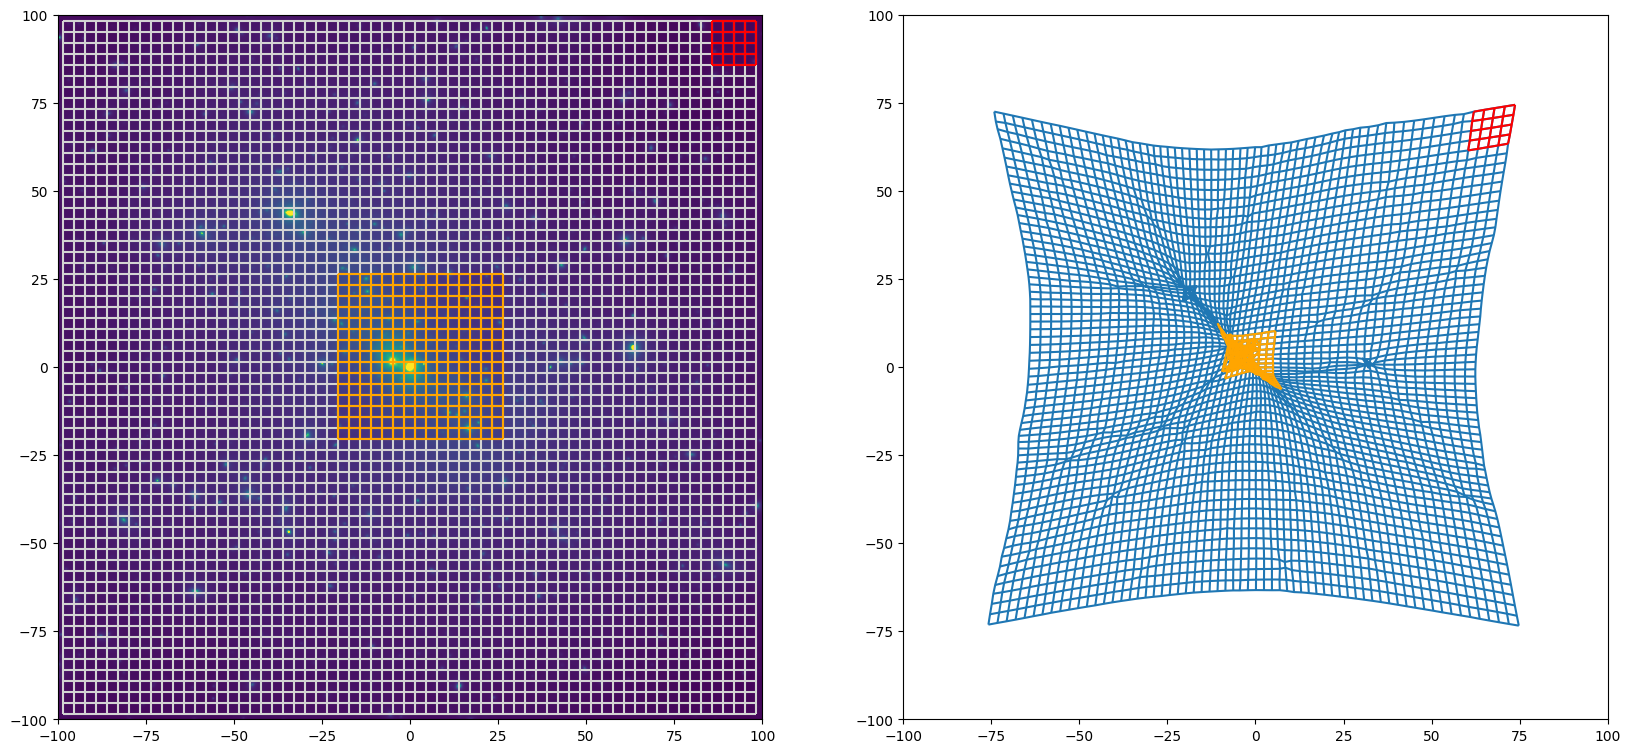

In [13]:
from matplotlib.collections import LineCollection

def plot_grid(x,y, ax=None, **kwargs):
    ax = ax or plt.gca()
    segs1 = np.stack((x,y), axis=2)
    segs2 = segs1.transpose(1,0,2)
    ax.add_collection(LineCollection(segs1, **kwargs))
    ax.add_collection(LineCollection(segs2, **kwargs))


fig, ax = plt.subplots(1,2,figsize=(20,10))
for i in [0,1]:
    ax[i].set_xlim([-fov/2.,fov/2])
    ax[i].set_ylim([-fov/2.,fov/2])
ax[0].imshow(kappa,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],vmax=3)
ax[1].imshow(kappa,alpha=0)


plot_grid(theta1_,theta2_, ax=ax[0],  color="lightgrey")
plot_grid(beta1, beta2, ax=ax[1], color="C0")

# select the upper left corner of the grid
iid = (theta1 > theta1[-6,-6]) & (theta2 > theta2[-6,-6])
n=np.sqrt(len(theta1_[iid])).astype(int)

t0_1 = theta1_[iid].reshape(n,n)
t0_2 = theta2_[iid].reshape(n,n)

b0_1 = beta1[iid].reshape(n,n)
b0_2 = beta2[iid].reshape(n,n)


plot_grid(t0_1, t0_2, ax=ax[0], color="red")
plot_grid(b0_1, b0_2, ax=ax[1], color="red")


# select a more central region of the grid
iid = (theta1 > 800) &  (theta1 < 1300) & (theta2 > 800) &  (theta2 < 1300) 
n=np.sqrt(len(theta1_[iid])).astype(int)

t1_1 = theta1_[iid].reshape(n,n)
t1_2 = theta2_[iid].reshape(n,n)

b1_1 = beta1[iid].reshape(n,n)
b1_2 = beta2[iid].reshape(n,n)


plot_grid(t1_1, t1_2, ax=ax[0], color="orange")
plot_grid(b1_1, b1_2, ax=ax[1], color="orange")

Let's focus in particular on what happens in the most dense region of the lens plane (orange points):

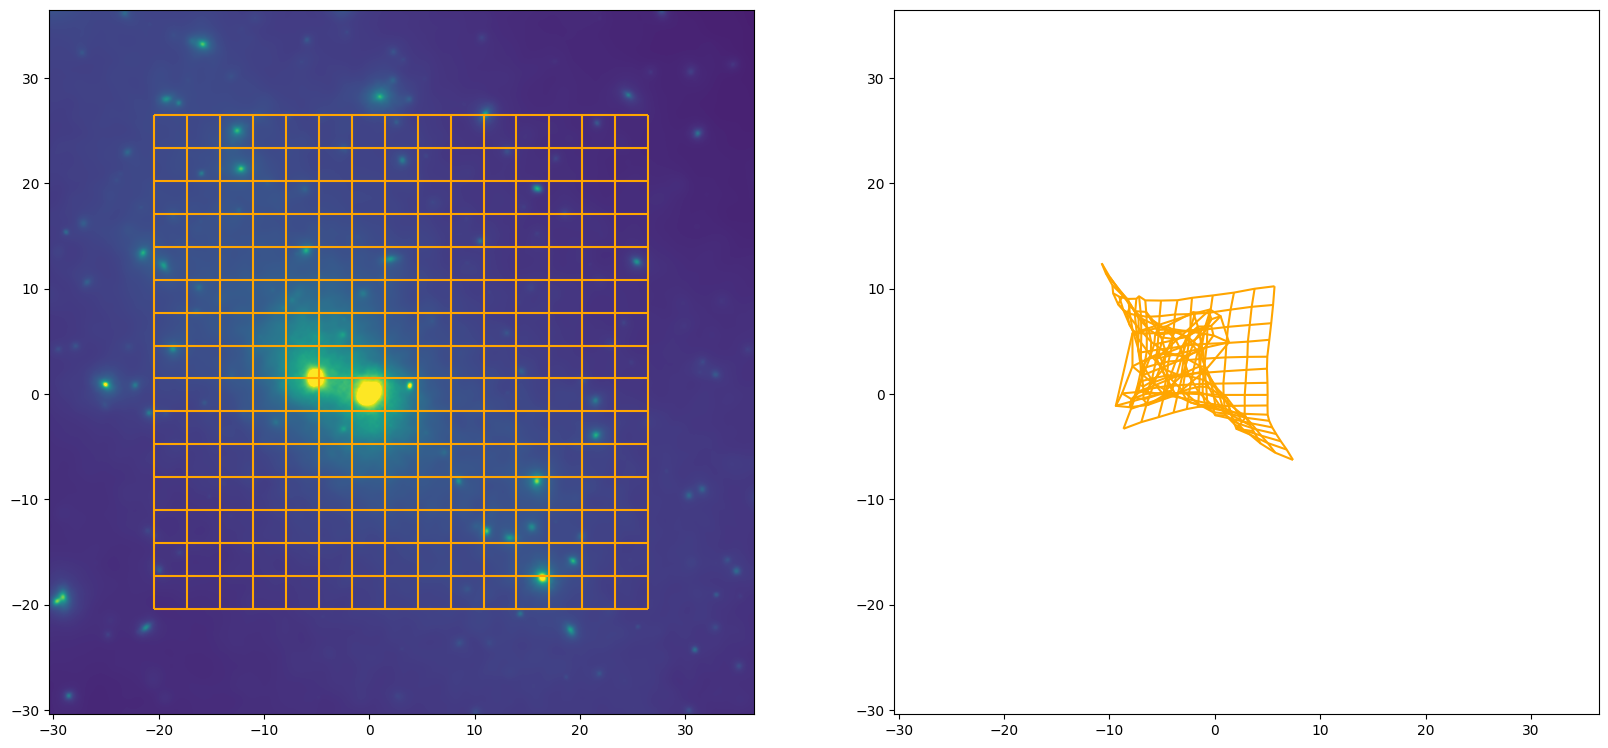

In [14]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
for i in [0,1]:
    ax[i].set_xlim([t1_1.min()-10,t1_1.max()+10])
    ax[i].set_ylim([t1_2.min()-10,t1_2.max()+10])
ax[0].imshow(kappa,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],vmax=3)
ax[1].imshow(kappa,alpha=0)


plot_grid(t1_1, t1_2, ax=ax[0], color="orange")
plot_grid(b1_1, b1_2, ax=ax[1], color="orange")

>**TASK: Is the mapping between the lens and the source plane linear in this region? Discuss this result comparing with the deflection angle maps computed earlier.**

TODO: WRITE YOUR ANSWERS HERE

## Part III: Magnification

### Lensing Jacobian and Magnification map

The next task is displaying the magnification map. As seen during Lecture 2, the magnification $\mu(\vec\theta)$ is the inverse of the determinant of the lensing Jacobian:

$$
\det A(\vec\theta) = [1-\kappa(\vec\theta)-\gamma(\vec\theta)][1-\kappa(\vec\theta)+\gamma(\vec\theta)]
$$

>**TASK: In the cell below, write the instructions to compute the module of the shear and the Jacobian determinant. Call them `gamma` and `detA`.** 



In [15]:
# TODO: compute the shear modulus and the determinant of the lensing Jacobian

gamma = np.sqrt(gamma1**2+gamma2**2)
detA = (1.0 - kappa)**2 - gamma**2

Use the next piece of code to display the absolute magnification map. 

> **Note**: The magnification can be negative! Negative magnifications imply parity inversion in the lensed images.

In a second step, uncomment the line to display the zero level contours of the lensing Jacobian. Along these lines the magnification is infinite. They are called *critical lines*.

Text(0, 0.5, '$\\theta_2$ [arcsec]')

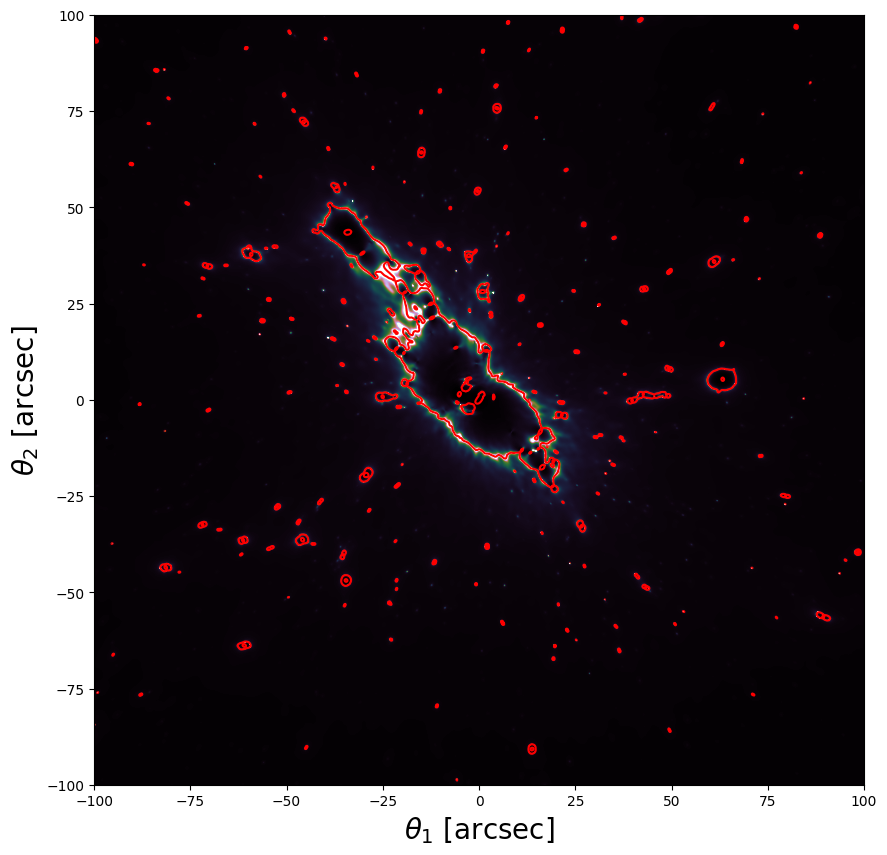

In [16]:
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(np.abs(1./detA),origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix',vmin=0.,vmax=100)
ax.contour(detA,linestyles=['-'],levels=[0.0],extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],colors='red')

ax.set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)

### Critical lines

There are two types of critical lines. Indeed, the lensing Jacobian has two eigenvalues:

$$
\lambda_t(\vec\theta) = 1-\kappa(\vec\theta)-\gamma(\vec\theta)
$$

and 

$$
\lambda_t(\vec\theta) = 1-\kappa(\vec\theta)+\gamma(\vec\theta)
$$

The Jacobian determinant is zero whenever one of the two eigenvalues is zero:
* the points $\vec\theta_t$ where $\lambda_t(\vec\theta_t)=0$ form the *tangential critical lines*;
* the points $\vec\theta_r$ where $\lambda_r(\vec\theta_r)=0$ form the *radial critical lines*;

>**TASK: Your next task is to make a new plot displaying the magnification as above, but drawing the tangential and radial critical lines with two different colors.**

Text(0, 0.5, '$\\theta_2$ [arcsec]')

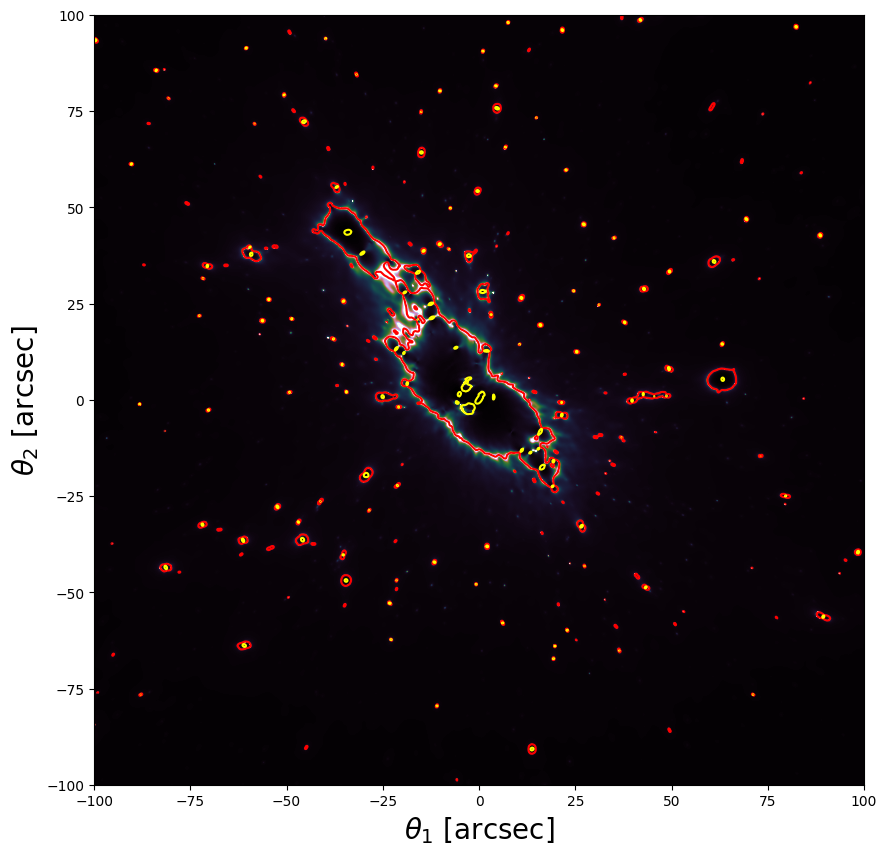

In [17]:
# TODO: display the tangential and radial critical lines using two different colors

lambdat = 1-kappa-gamma
lambdar = 1-kappa+gamma

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(np.abs(1./detA),origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],cmap='cubehelix',vmin=0.,vmax=100)
ax.contour(lambdat,linestyles=['-'],levels=[0.0],extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],colors='red')
ax.contour(lambdar,linestyles=['-'],levels=[0.0],extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],colors='yellow')

ax.set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)

### Caustics

If we map the critical lines onto the source plane, we find the *caustics*. 

The following piece of code (using the [`measure.find_countours`](https://scikit-image.org/docs/stable/auto_examples/edges/plot_contours.html) from the `scikit-image` package) can be used to store the zero level contours of the lensing Jacobian maps into lists of coordinates that we can then map onto the source plane using the lens equation.

In [18]:
from skimage import measure
critlines = measure.find_contours(detA, 0.0)
print (('I found %i critical lines') % (len(critlines)))

I found 322 critical lines


We can display the critical lines using different colors as follows:

Text(0, 0.5, '$\\theta_2$ [arcsec]')

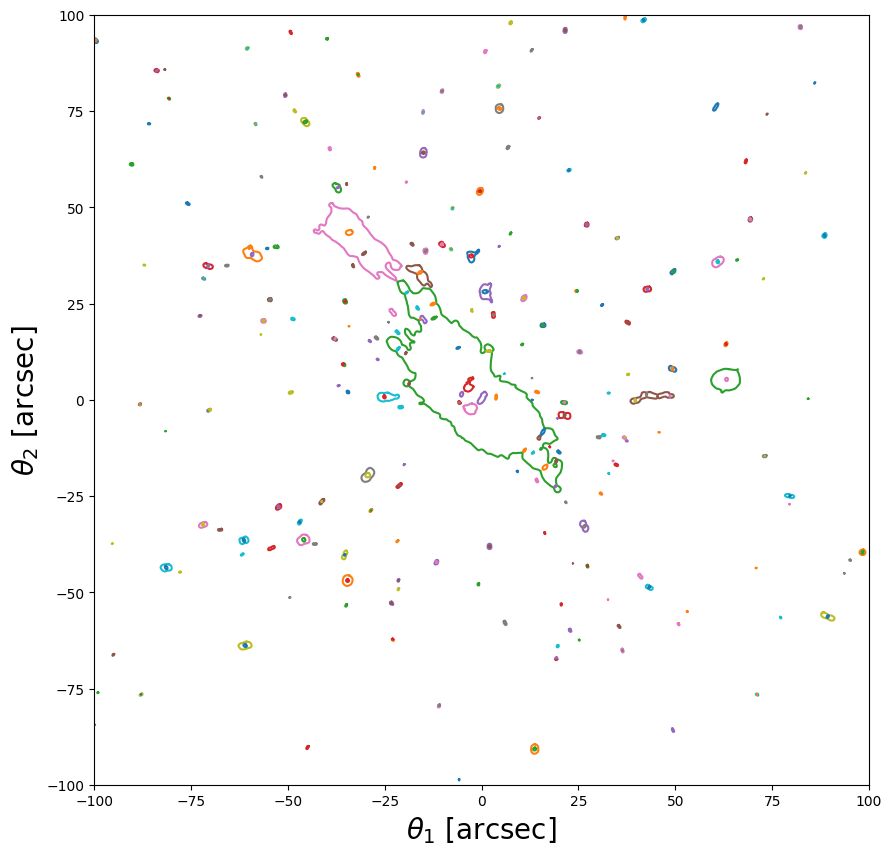

In [19]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for cl in critlines:
    thetac2, thetac1 = cl[:,0], cl[:,1]
    thetac1 = thetac1 * pixelscale - fov/2.0
    thetac2 = thetac2 * pixelscale - fov/2.0
    ax.plot(thetac1, thetac2, '-')

ax.set_xlim([-fov/2.,fov/2.])
ax.set_ylim([-fov/2.,fov/2.])

ax.set_xlabel(r'$\theta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\theta_2$ [arcsec]',fontsize=20)

To map the critical points onto the source plane, we need to read their deflection angles off the deflection angle maps. This operation can be completed with the [`ndimage.map_coordinates`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.map_coordinates.html) of `scipy`: 

Text(0, 0.5, '$\\beta_2$ [arcsec]')

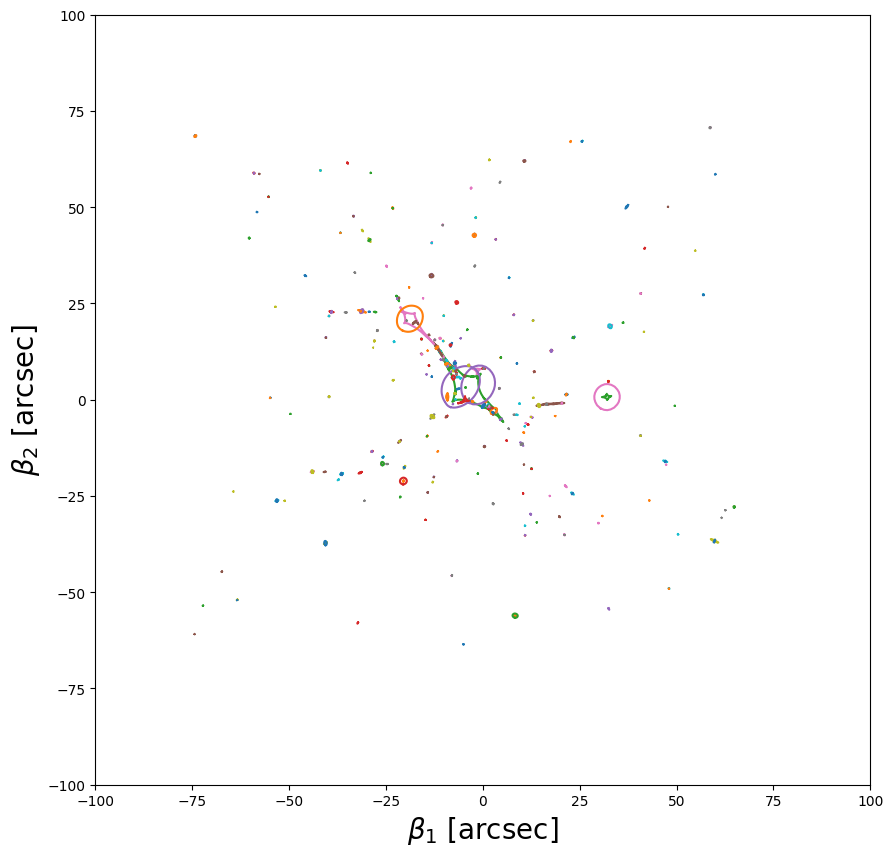

In [20]:
from scipy.ndimage import map_coordinates

fig,ax = plt.subplots(1,1,figsize=(10,10))

for cl in critlines:
    thetac2, thetac1 = cl[:,0], cl[:,1]
    ac1 = map_coordinates(a1, [[thetac2], [thetac1]], order=1, prefilter=True)
    ac2 = map_coordinates(a2, [[thetac2], [thetac1]], order=1, prefilter=True)

    thetac1 = thetac1 * pixelscale - fov/2.0
    thetac2 = thetac2 * pixelscale - fov/2.0

    betac1 = thetac1 - ac1[0]
    betac2 = thetac2 - ac2[0]

    ax.plot(betac1, betac2, '-')

ax.set_xlim([-fov/2.,fov/2.])
ax.set_ylim([-fov/2.,fov/2.])

ax.set_xlabel(r'$\beta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\beta_2$ [arcsec]',fontsize=20)

Let's focus on the largest caustic near the center of the FOV and draw them on the top of the figure displaying the orange distorted grid from the previous exercise: 

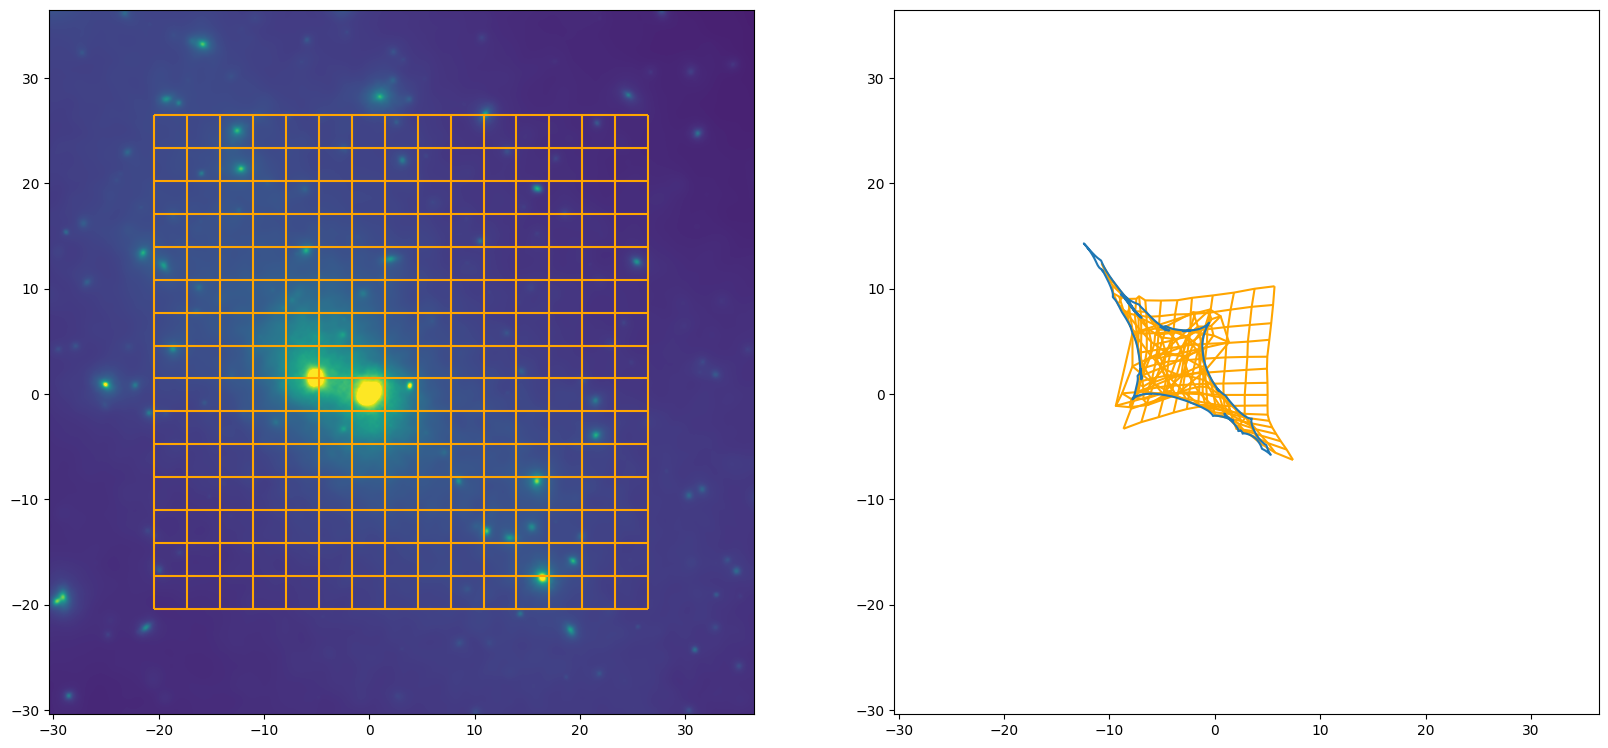

In [21]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
for i in [0,1]:
    ax[i].set_xlim([t1_1.min()-10,t1_1.max()+10])
    ax[i].set_ylim([t1_2.min()-10,t1_2.max()+10])
ax[0].imshow(kappa,origin='lower',extent=[-fov/2.,fov/2.,-fov/2.,fov/2.],vmax=3)
ax[1].imshow(kappa,alpha=0)


plot_grid(t1_1, t1_2, ax=ax[0], color="orange")
plot_grid(b1_1, b1_2, ax=ax[1], color="orange")

critlines_sorted = sorted(critlines,key=lambda x: len(x),reverse=True)
cl = critlines_sorted[0]
thetac2, thetac1 = cl[:,0], cl[:,1]
ac1 = map_coordinates(a1, [[thetac2], [thetac1]], order=1, prefilter=True)
ac2 = map_coordinates(a2, [[thetac2], [thetac1]], order=1, prefilter=True)

thetac1 = thetac1 * pixelscale - fov/2.0
thetac2 = thetac2 * pixelscale - fov/2.0

betac1 = thetac1 - ac1[0]
betac2 = thetac2 - ac2[0]

ax[1].plot(betac1, betac2, '-')

>**TASK: What do you notice? How can you interpret what you see?**


TODO: WRITE YOUR ANSWER HERE

The caustics that correspond to the tangential and radial critical lines are called *tangential* and *radial* caustics, respectively. 

>**TASK: Your last task for this Notebook is to repeat the previous calculations for the tangential and radial critical lines separately, producing a figure that shows all the tangential caustics in blue and all the radial critical lines in red.**

I found 203 radial critical lines
I found 134 radial critical lines


Text(0, 0.5, '$\\beta_2$ [arcsec]')

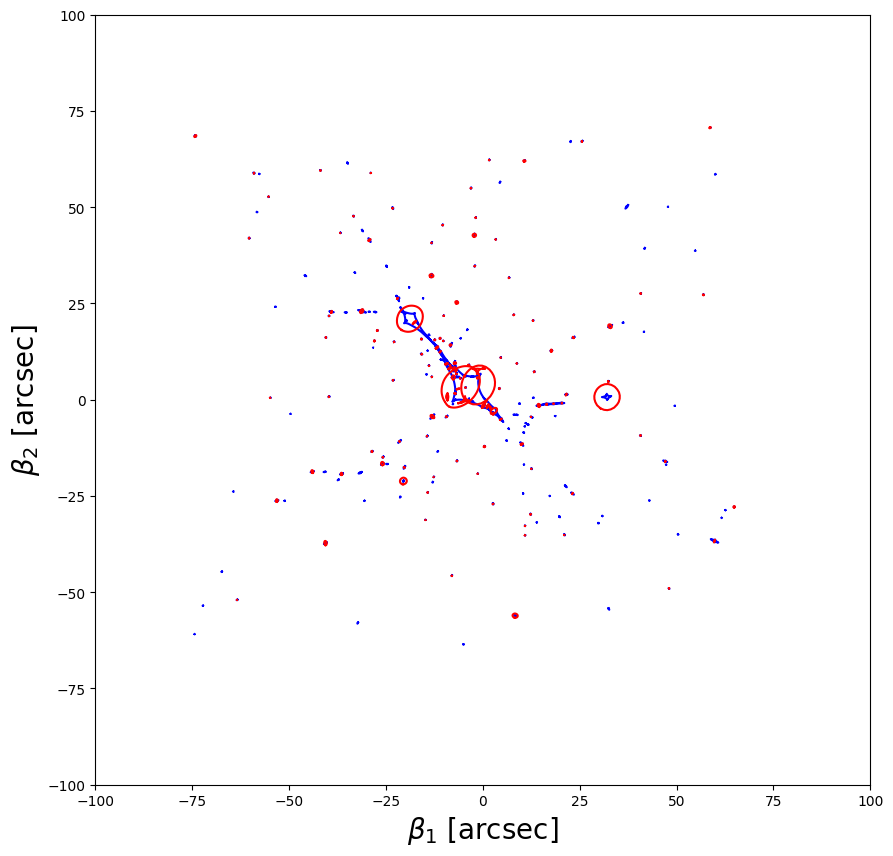

In [22]:
# TODO: produce a figure that shows all the tangential caustics in blue and all the radial critical lines in red.

tancritlines = measure.find_contours(lambdat, 0.0)
print (('I found %i radial critical lines') % (len(tancritlines)))

radcritlines = measure.find_contours(lambdar, 0.0)
print (('I found %i radial critical lines') % (len(radcritlines)))

fig,ax = plt.subplots(1,1,figsize=(10,10))

for cl in tancritlines:
    thetac2, thetac1 = cl[:,0], cl[:,1]
    ac1 = map_coordinates(a1, [[thetac2], [thetac1]], order=1, prefilter=True)
    ac2 = map_coordinates(a2, [[thetac2], [thetac1]], order=1, prefilter=True)

    thetac1 = thetac1 * pixelscale - fov/2.0
    thetac2 = thetac2 * pixelscale - fov/2.0

    betac1 = thetac1 - ac1[0]
    betac2 = thetac2 - ac2[0]

    ax.plot(betac1, betac2, '-', color='blue')

for cl in radcritlines:
    thetac2, thetac1 = cl[:,0], cl[:,1]
    ac1 = map_coordinates(a1, [[thetac2], [thetac1]], order=1, prefilter=True)
    ac2 = map_coordinates(a2, [[thetac2], [thetac1]], order=1, prefilter=True)

    thetac1 = thetac1 * pixelscale - fov/2.0
    thetac2 = thetac2 * pixelscale - fov/2.0

    betac1 = thetac1 - ac1[0]
    betac2 = thetac2 - ac2[0]

    ax.plot(betac1, betac2, '-', color='red')    

ax.set_xlim([-fov/2.,fov/2.])
ax.set_ylim([-fov/2.,fov/2.])

ax.set_xlabel(r'$\beta_1$ [arcsec]',fontsize=20)
ax.set_ylabel(r'$\beta_2$ [arcsec]',fontsize=20)